In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import util

In [12]:
def initial_state():
    betas = []
    previous_x = []
    return betas, previous_x

In [13]:
def predict(state, kernel, x_i):
    betas, previous_x = state
    kernel_sum = 0
    for i, beta in enumerate(betas):
        kernel_sum += beta * kernel(previous_x[i], x_i)
    h_theta = sign(kernel_sum)
    return h_theta

In [14]:
def update_state(state, kernel, learning_rate, x_i, y_i):
    betas, previous_x = state
    kernel_sum = 0
    for i, beta in enumerate(betas):
        kernel_sum += beta * kernel(previous_x[i], x_i)
    h_theta = sign(kernel_sum)
    beta_1 = learning_rate * (y_i - h_theta)
    betas.append(beta_1)
    previous_x.append(x_i)
    return betas, previous_x

In [15]:
def sign(a):
    if a >= 0:
        return 1
    else:
        return 0
def dot_kernel(a, b):
    return np.dot(a, b)


def rbf_kernel(a, b, sigma=1):
    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * (sigma) ** 2)
    return math.exp(scaled_distance)

In [16]:
def train_perceptron(kernel_name, kernel, learning_rate):
    """Train a perceptron with the given kernel.
    This function trains a perceptron with a given kernel and then
    uses that perceptron to make predictions.
    The output predictions are saved to src/perceptron/perceptron_{kernel_name}_predictions.txt.
    The output plots are saved to src/perceptron/perceptron_{kernel_name}_output.pdf.
    Args:
        kernel_name: The name of the kernel.
        kernel: The kernel function.
        learning_rate: The learning rate for training.
    """
    train_x, train_y = util.load_csv('train.csv')

    state = initial_state()

    for x_i, y_i in zip(train_x, train_y):
        update_state(state, kernel, learning_rate, x_i, y_i)

    test_x, test_y = util.load_csv('test.csv')

    plt.figure(figsize=(12, 8))
    util.plot_contour(lambda a: predict(state, kernel, a))
    util.plot_points(test_x, test_y)
    plt.savefig('perceptron_{}_output.png'.format(kernel_name))

    predict_y = [predict(state, kernel, test_x[i, :]) for i in range(test_y.shape[0])]

    np.savetxt('perceptron_{}_predictions'.format(kernel_name), predict_y)

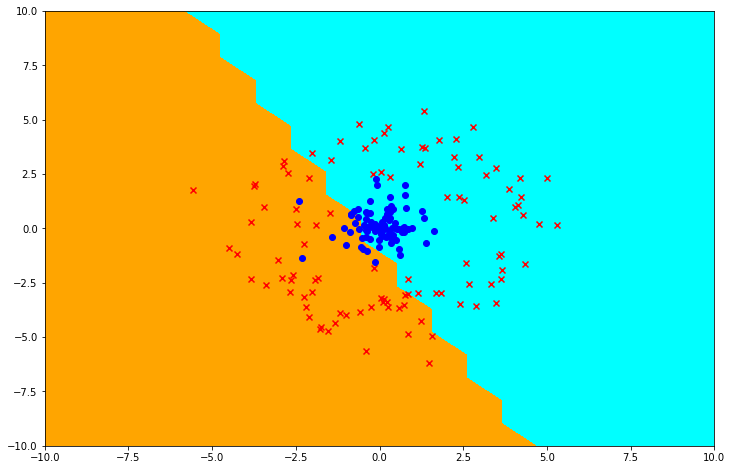

In [17]:
train_perceptron('dot', dot_kernel, 0.5)

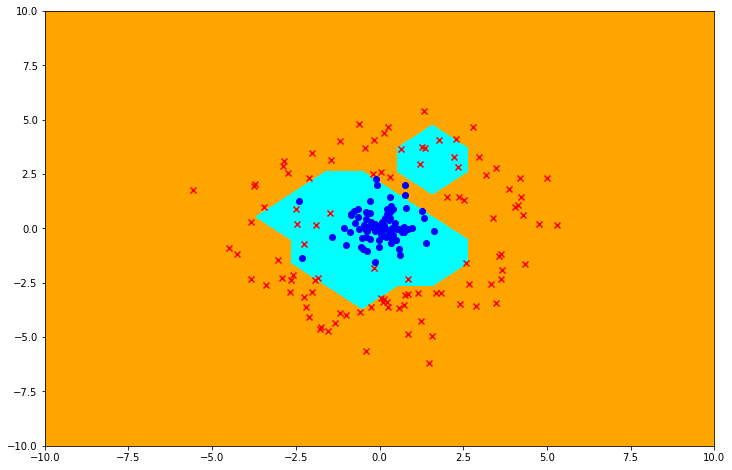

In [18]:
train_perceptron('rbf', rbf_kernel, 0.5)